In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Conv1D, MaxPooling1D, Dense, Flatten

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Import Dataset

In [ ]:
# Loading Essential libraries
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/main/dataset_preprocessing.csv',) #dataset hasil preprocessing
df.head()

,username,rate,date,label,sentimen,reviews,produk,text_length,anomaly_score,lowercase_reviews,...,no_number_reviews,no_atribut_reviews,no_repetition_reviews,no_whitespace_reviews,no_banned_reviews,no_slang_reviews,clean_reviews,tokens_reviews,stopword_reviews,stem_reviews
0,nadiadiani_,3,19-03-2021 6:58,non,neutral,"Ketahuilah apa jenis kulitmu dulu,,utamakan gu...",Acnes Creamy Wash,282,1,"ketahuilah apa jenis kulitmu dulu,,utamakan gu...",...,"ketahuilah apa jenis kulitmu dulu,,utamakan gu...",ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dahulu utamakan g...,ketahuilah apa jenis kulitmu dahulu utamakan g...,"['ketahuilah', 'apa', 'jenis', 'kulitmu', 'dah...","['ketahuilah', 'jenis', 'kulitmu', 'utamakan',...",tahu jenis kulit utama produk kandung hydratin...
1,jiminee10,3,31-08-2022 5:02,fake,neutral,Salah satu facial wash dari drugstore yang lay...,Acnes Creamy Wash,167,1,salah satu facial wash dari drugstore yang lay...,...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,"['salah', 'satu', 'facial', 'wash', 'dari', 'd...","['salah', 'facial', 'wash', 'drugstore', 'laya...",salah facial wash drugstore layak coba busa ku...
2,srihastutik1987,3,2024-05-22 22:24,fake,neutral,Efek:memberikan kulit tampak lebih cerah\n Tek...,MS GLOW FACIAL WASH,103,1,efek:memberikan kulit tampak lebih cerah\n tek...,...,efek:memberikan kulit tampak lebih cerah\n tek...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,"['efek', 'memberikan', 'kulit', 'tampak', 'leb...","['efek', 'kulit', 'cerah', 'tekstur', 'lembut'...",efek kulit cerah tekstur lembut nyaman asli ba...
3,Aisyah_18,3,01-11-2021 11:32,fake,neutral,cukup memuaskan dengan harga yang terjangkau ...,Acnes Creamy Wash,104,1,cukup memuaskan dengan harga yang terjangkau ...,...,cukup memuaskan dengan harga yang terjangkau ...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,"['cukup', 'memuaskan', 'dengan', 'harga', 'yan...","['memuaskan', 'harga', 'terjangkau', 'kualitas...",muas harga jangkau kualitas lumayan sedia mark...
4,christinjuniarti,3,29-06-2018 1:01,trusted,neutral,Dr segi packaging sih oke2 aja dan bisa liat w...,Lip Cream LA Girl,431,1,dr segi packaging sih oke2 aja dan bisa liat w...,...,dr segi packaging sih oke aja dan bisa liat w...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dari segi packaging sih oke saja dan bisa liha...,dari segi packaging sih oke saja dan bisa liha...,"['dari', 'segi', 'packaging', 'sih', 'oke', 's...","['segi', 'packaging', 'oke', 'warna', 'produk'...",segi packaging oke warna produk dalam pas dico...


# Modeling CNN - Sentimen


In [ ]:
max_len = 400  # Max number of words in a sequence
max_features = 20000
# Tokenize the text
df['stem_reviews'] = df['stem_reviews'].astype(str)
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['stem_reviews'])
sequences = tokenizer.texts_to_sequences(df['stem_reviews'])

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numerical labels
sentiment_label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
y = df['sentimen'].map(sentiment_label_map).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## A. Solely Embedding


In [ ]:
# Define the CNN model
model_A = Sequential(name="Model_A")
model_A.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len, input_shape=(max_len,)))
model_A.add(Conv1D(128, kernel_size=3, activation='relu'))  # Convolutional layer
model_A.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model_A.add(Flatten())  # Flatten layer to convert 2D to 1D
model_A.add(Dense(3, activation='softmax'))  # Output layer with softmax activation

model_A.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model_A.summary()


Model: "Model_A"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 400, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 398, 128)            │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 199, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │          76,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,685,699 (10.25 MB)

 Trainable params: 2,685,699 (10.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_A_epoch_{epoch:02d}_val_loss_{val_loss:.2f}_val_acc_{val_accuracy:.2f}.keras',
                                   monitor='val_loss',
                                   save_best_only=True)

# Train the model with the callbacks
history_A = model_A.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.3679 - loss: 1.0931 - val_accuracy: 0.6271 - val_loss: 0.9412
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.7553 - loss: 0.7325 - val_accuracy: 0.8500 - val_loss: 0.4170
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9143 - loss: 0.2336 - val_accuracy: 0.8771 - val_loss: 0.3175
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.9727 - loss: 0.1040 - val_accuracy: 0.9083 - val_loss: 0.3022
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.9861 - loss: 0.0490 - val_accuracy: 0.9229 - val_loss: 0.3065
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9929 - loss: 0.0359 - val_accuracy: 0.9167 - val_loss: 0.3227
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.9967 - loss: 0.0234 - val_accuracy: 0.9167 - val_loss: 0.3370


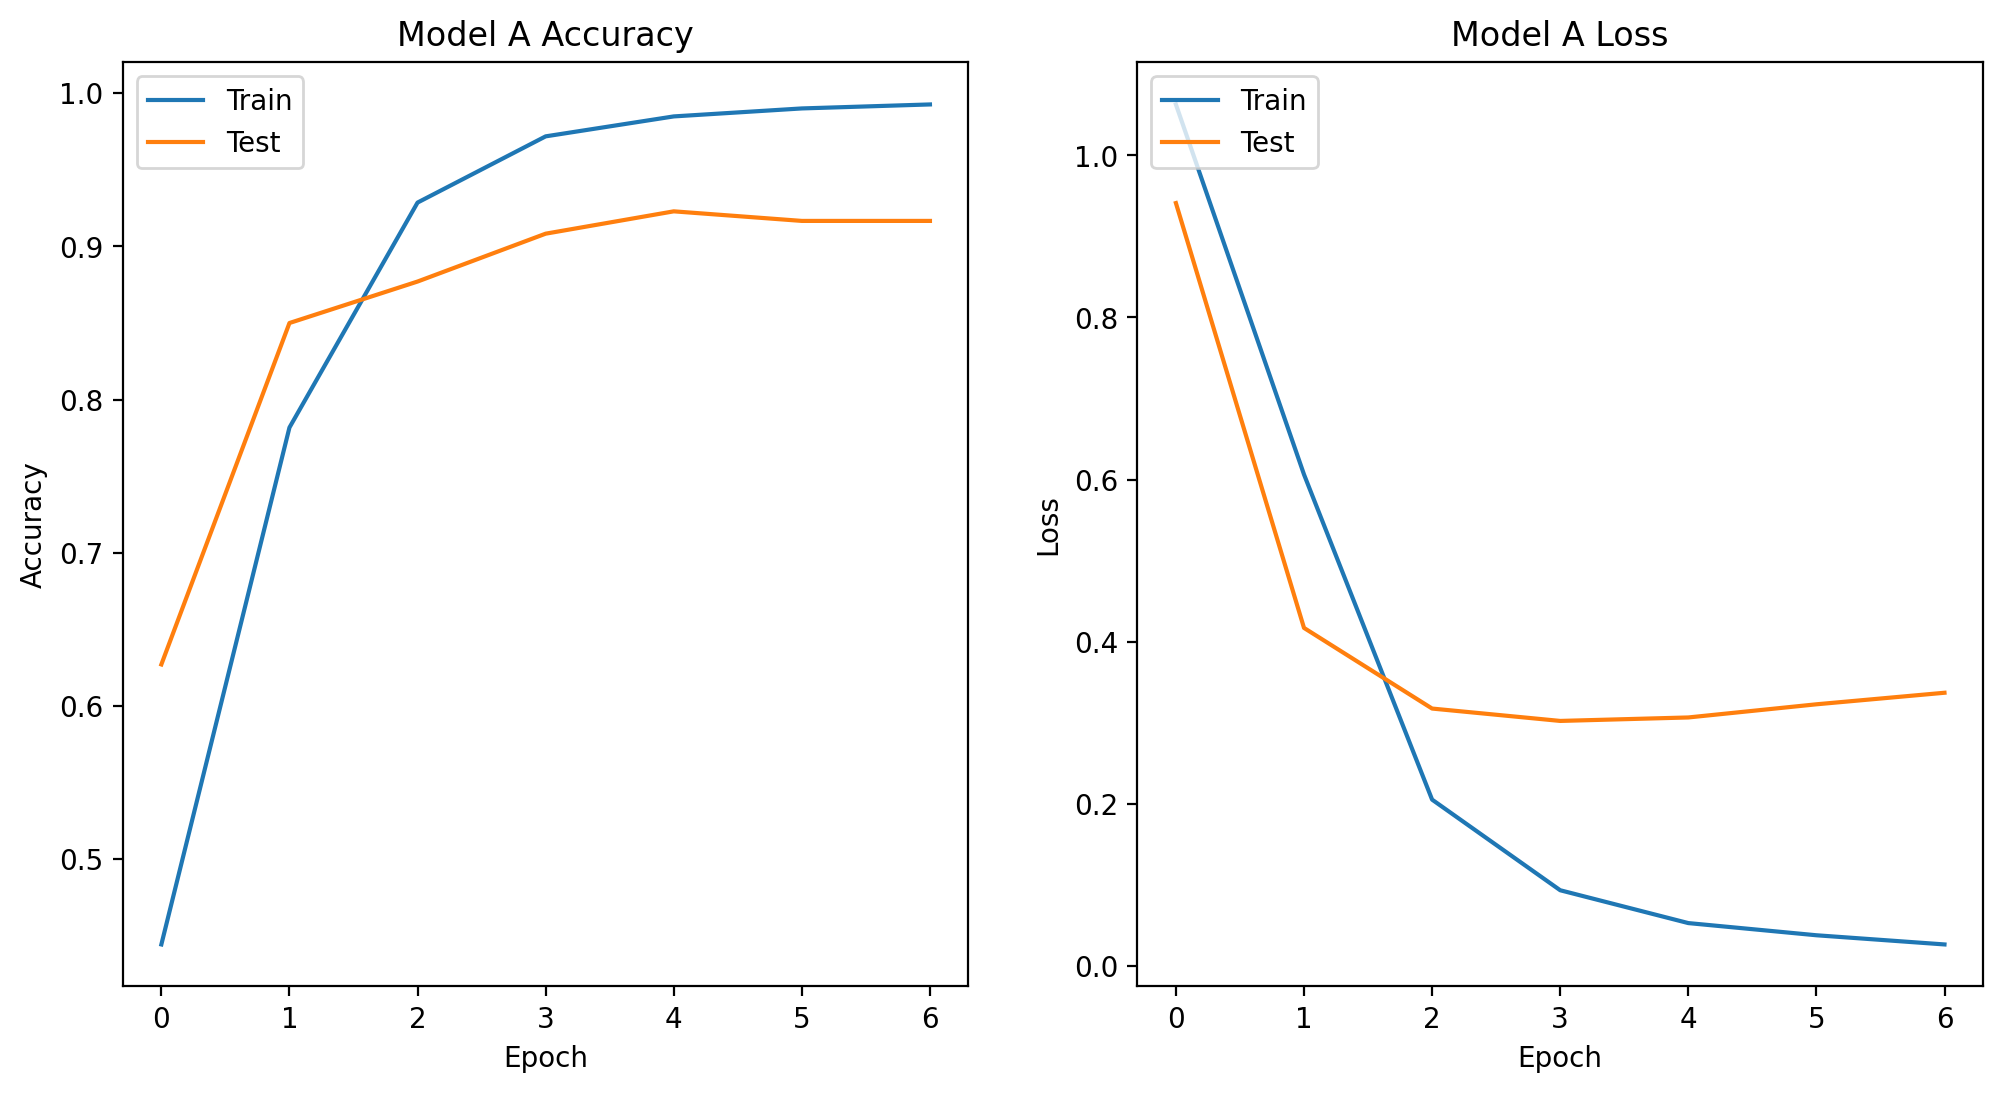

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_A.history['accuracy'])
plt.plot(history_A.history['val_accuracy'])
plt.title('Model A Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history_A.history['loss'])
plt.plot(history_A.history['val_loss'])
plt.title('Model A Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Test Accuracy: 0.9083
Test Loss: 0.3022
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classification Report Model A:
              precision    recall  f1-score   support

    negative       0.92      0.92      0.92       157
     neutral       0.88      0.89      0.88       168
    positive       0.93      0.92      0.92       155

    accuracy                           0.91       480
   macro avg       0.91      0.91      0.91       480
weighted avg       0.91      0.91      0.91       480



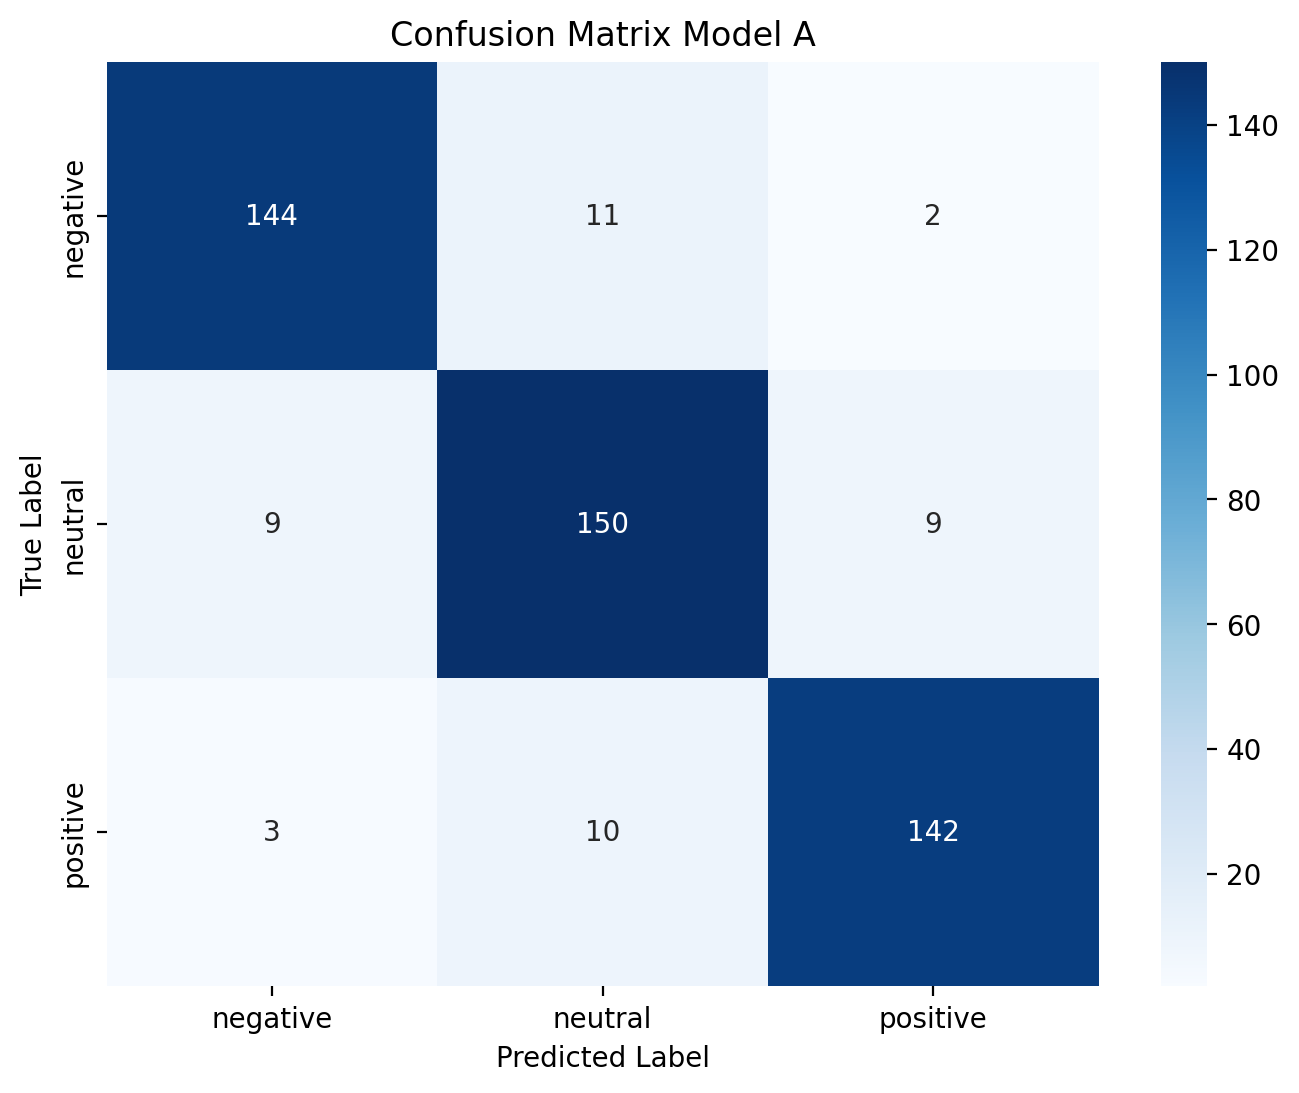

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test data
loss, accuracy = model_A.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

# Predict the labels for the test data
y_pred = model_A.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Generate the classification report
print("Classification Report Model A:")
print(classification_report(y_test, y_pred_classes, target_names=['negative', 'neutral', 'positive']))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix Model A')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## B. Glove



In [ ]:
import numpy as np
import gensim.downloader as api

# Load the GloVe model (trained on English)
glove_model = api.load('glove-wiki-gigaword-100')  # 100-dimensional GloVe embeddings

embedding_dim = 100  # Since we are using 'glove-wiki-gigaword-100', the dimension is 100

# Create an embedding matrix
embedding_matrix = np.zeros((max_features, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < max_features:
        try:
            embedding_vector = glove_model[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            pass


[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

model_B = Sequential(name="Model_B")
model_B.add(Embedding(input_dim=max_features,
                      output_dim=embedding_dim,
                      input_length=max_len,
                      weights=[embedding_matrix],
                      trainable=False))  # Set trainable=False to use the pretrained embeddings as they are

model_B.add(Conv1D(128, kernel_size=3, activation='relu'))  # Convolutional layer
model_B.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model_B.add(Flatten())  # Flatten layer to convert 2D to 1D
model_B.add(Dense(3, activation='softmax'))  # Output layer with softmax activation

model_B.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_B.build(input_shape=(None, max_len))

model_B.summary()


Model: "Model_B"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 400, 100)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 398, 128)            │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 199, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │          76,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,114,947 (8.07 MB)

 Trainable params: 114,947 (449.01 KB)

 Non-trainable params: 2,000,000 (7.63 MB)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_B_epoch_{epoch:02d}_val_loss_{val_loss:.2f}_val_acc_{val_accuracy:.2f}.keras',
                                   monitor='val_loss',
                                   save_best_only=True)

# Train the model with the callbacks
history_B = model_B.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.4309 - loss: 1.0562 - val_accuracy: 0.6542 - val_loss: 0.8973
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7543 - loss: 0.7734 - val_accuracy: 0.7479 - val_loss: 0.6864
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.8483 - loss: 0.5170 - val_accuracy: 0.7792 - val_loss: 0.5499
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9195 - loss: 0.3420 - val_accuracy: 0.8146 - val_loss: 0.4886
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9405 - loss: 0.2460 - val_accuracy: 0.8396 - val_loss: 0.4402
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9606 - loss: 0.1844 - val_accuracy: 0.8542 - val_loss: 0.4043
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9685 - loss: 0.1490 - val_accuracy: 0.8687 - val_loss: 0.3859
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9734 - loss: 0.1217 - val_accuracy: 0.8604 - v

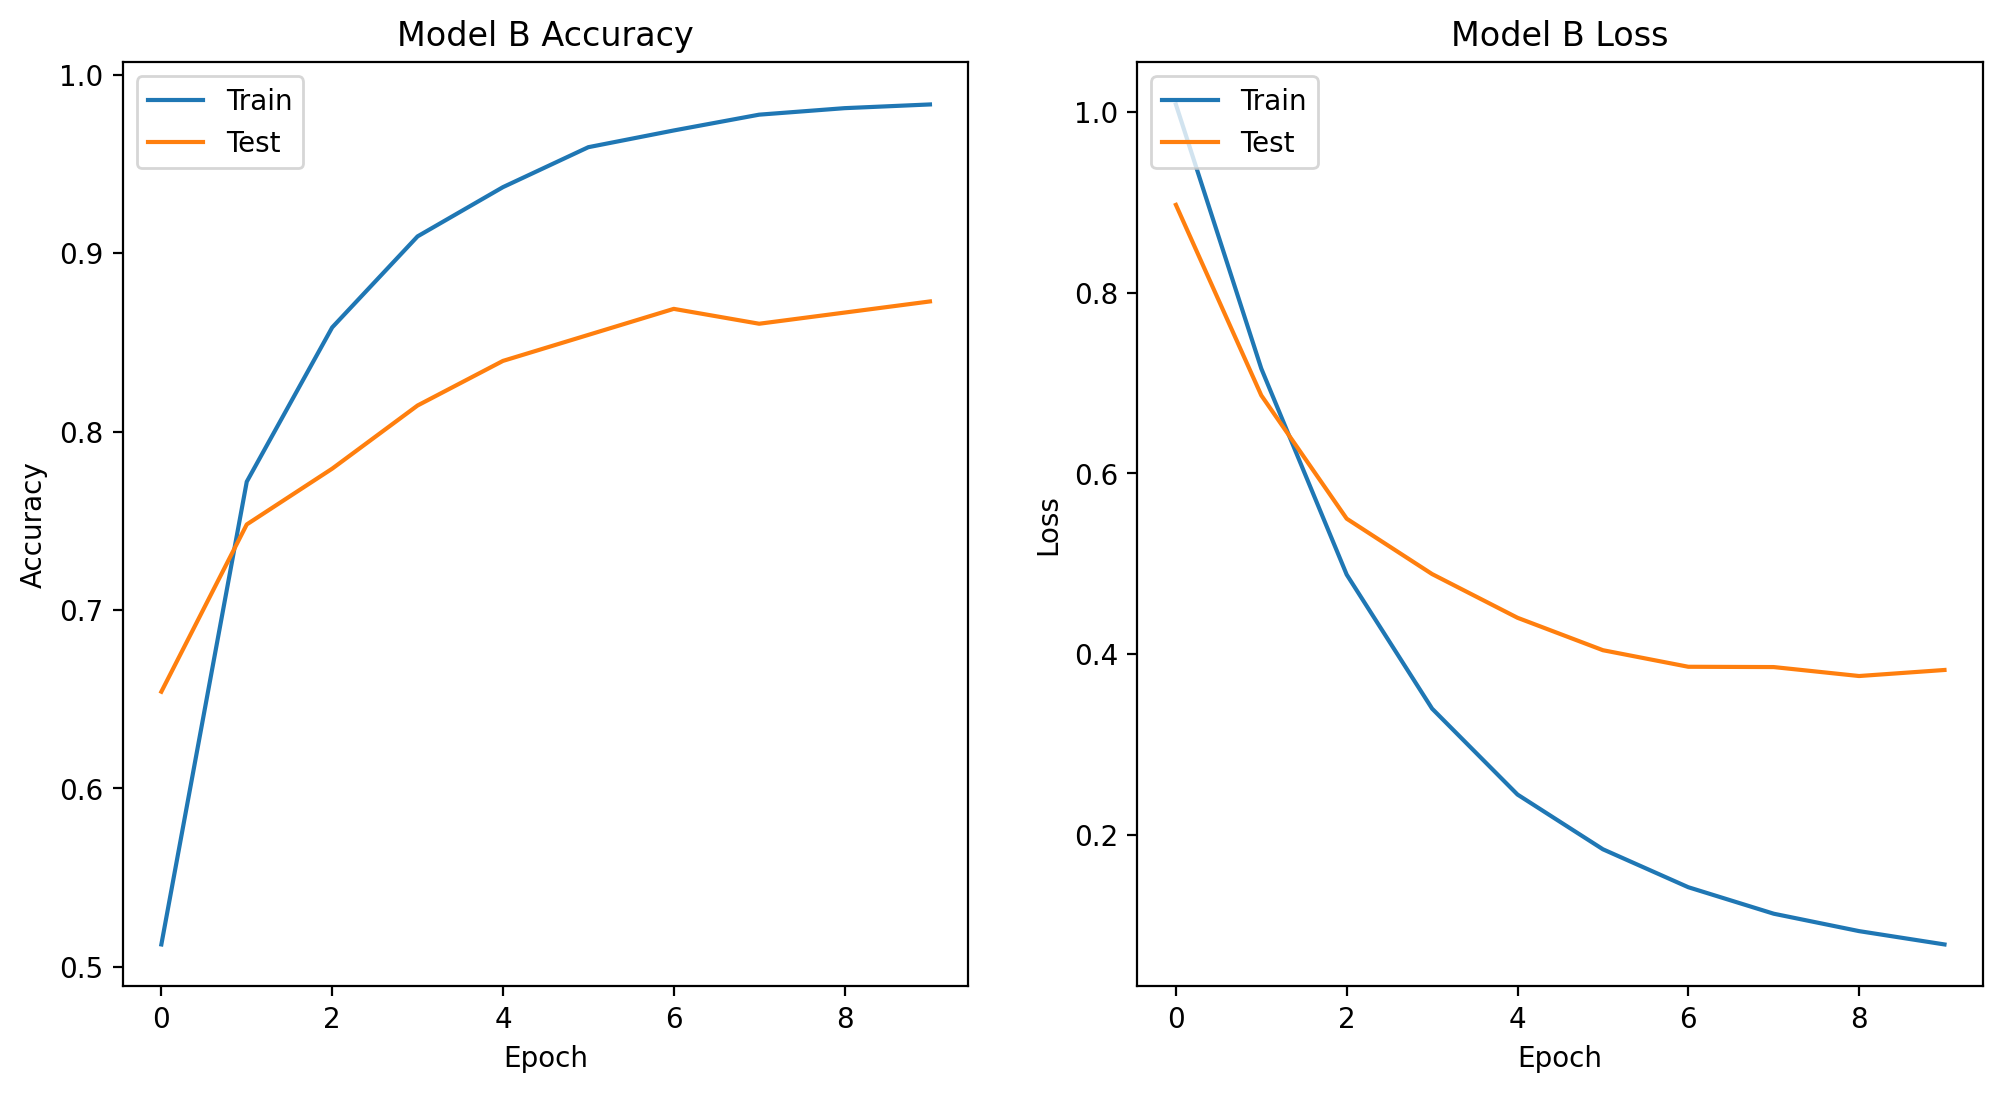

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_B.history['accuracy'])
plt.plot(history_B.history['val_accuracy'])
plt.title('Model B Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history_B.history['loss'])
plt.plot(history_B.history['val_loss'])
plt.title('Model B Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Test Accuracy: 0.8667
Test Loss: 0.3757
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Classification Report Model_A:
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87       157
     neutral       0.90      0.82      0.86       168
    positive       0.84      0.91      0.88       155

    accuracy                           0.87       480
   macro avg       0.87      0.87      0.87       480
weighted avg       0.87      0.87      0.87       480



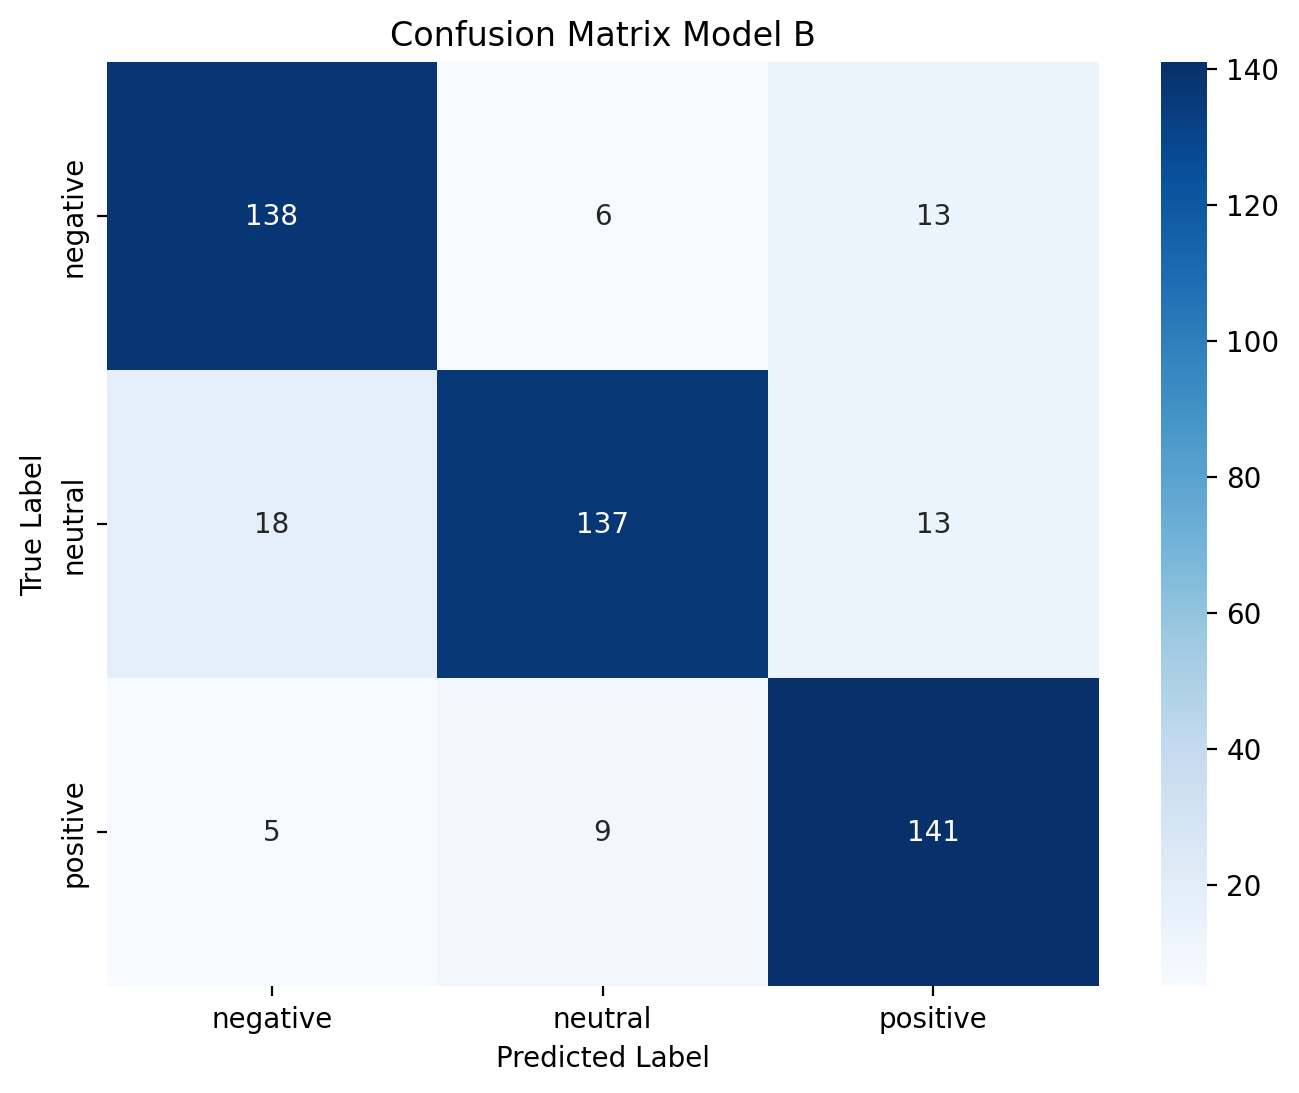

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test data
loss, accuracy = model_B.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

# Predict the labels for the test data
y_pred = model_B.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Generate the classification report
print("Classification Report Model_A:")
print(classification_report(y_test, y_pred_classes, target_names=['negative', 'neutral', 'positive']))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix Model B')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# from keras.models import load_model

# def predict_sentiment(text, model, tokenizer, max_len):
#     # Tokenize the input text
#     sequences = tokenizer.texts_to_sequences([text])
#     padded_sequences = pad_sequences(sequences, maxlen=max_len)

#     # Predict the sentiment
#     prediction = model.predict(padded_sequences)
#     predicted_class = prediction.argmax(axis=1)[0]
#     confidence = prediction[0][predicted_class] * 100

#     # Map the predicted class to the sentiment label
#     sentiment_label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
#     predicted_label = sentiment_label_map[predicted_class]

#     return predicted_label, confidence

# # Load the tokenizer and model
# tokenizer = Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(df['stem_reviews'])  # Ensure the tokenizer is fitted on the training data
# best_model = load_model('best_model.keras')

In [ ]:
# # Example usage
# text = input("Enter the text to analyze sentiment: ")
# predicted_label, confidence = predict_sentiment(text, best_model, tokenizer, max_len)

# print(f'Text: {text}')
# print(f'Predicted Sentiment: {predicted_label}')
# print(f'Confidence: {confidence:.2f}%')